# Avant Data Challange

In [1]:
import numpy as np
import pandas as pd
import gc

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [43]:
print("Read data file to obtain some statistic about the features and target")
data = pd.read_csv('data.csv')
print "shape of data file: ", data.shape

Read data file to obtain some statistic about the features and target
shape of data file:  (80000, 26)


In [44]:
data.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,88787390,30000,60 months,761.64,6 years,RENT,100100.0,Verified,Sep-2016,Current,...,Dec-2016,709,705,0,0,0,26.0,NaN,0,0.0
1,74722660,30000,60 months,692.93,10+ years,MORTGAGE,235000.0,Source Verified,Apr-2016,Current,...,Dec-2016,649,645,0,0,1,16.0,NaN,1,3.0
2,67919555,16000,60 months,379.39,6 years,RENT,84000.0,Not Verified,Jan-2016,Current,...,Dec-2016,739,735,0,0,0,80.0,NaN,0,2.0
3,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-2015,Fully Paid,...,Oct-2016,749,745,0,0,0,NaN,42.0,0,NaN
4,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-2016,Fully Paid,...,Dec-2016,709,705,0,0,0,NaN,NaN,2,5.0


In [4]:
data = data.drop(["last_credit_pull_d", "last_fico_range_high", "last_fico_range_low"], axis=1)
print "shape of data file: ", data.shape

shape of data file:  (80000, 23)


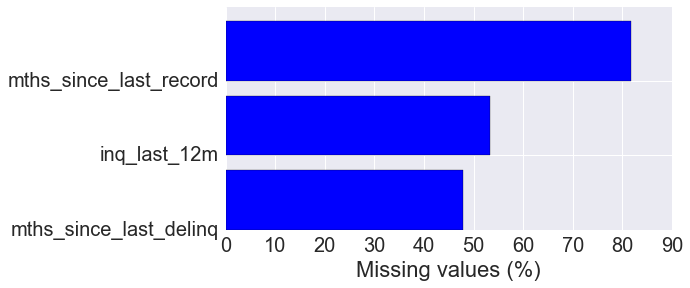

In [14]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df['missing_count'] = (missing_df['missing_count'] / data.shape[0]) * 100

sns.set(font_scale=2)
ind = np.arange(missing_df.shape[0])
width = 1.
fig, ax = plt.subplots(figsize=(8,4))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing values (%)")
#ax.set_title("Number of missing values in each column")
plt.show()

In [15]:
data = data.drop(["mths_since_last_record"], axis=1)
print "shape of data file: ", data.shape

shape of data file:  (80000, 22)


In [17]:
numerical_features = []
categorical_features = []
for col, dtype in zip(data.columns, data.dtypes):
    if dtype == "object":
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print "List of categorical fetures: "
print categorical_features
print "List of numerical fetures: "
print numerical_features

List of categorical fetures: 
['term', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line']
List of numerical fetures: 
['id', 'loan_amnt', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'inq_last_6mths', 'inq_last_12m']


In [19]:
# There are three fetures for date that should be splited into month and year
date_features = ["issue_d", "earliest_cr_line"]

# I define a dictionary to convert month to integer variable
months = {"Jan" : 1, "Feb" : 2, "Mar" : 3, "Apr" : 4, "May" : 5, "Jun": 6, "Jul" : 7, "Aug" : 8, "Sep" : 9,
          "Oct" : 10, "Nov" : 11, "Dec" :12}

In [20]:
for col in date_features:
    print col
    name = col + "_month"
    data[name] = map(lambda x: months[x.split("-")[0]], data[col])
    name = col + "_year"
    data[name] = map(lambda x: np.int(x.split("-")[1]), data[col])

issue_d
earliest_cr_line


In [21]:
# Drop the original features
data = data.drop(date_features, axis=1)

In [31]:
data["default"] = (data.loan_status == "Default") * 1

In [34]:
data.groupby("emp_length")["default"].mean()

emp_length
1 year       0.081937
10+ years    0.068441
2 years      0.078944
3 years      0.076693
4 years      0.075821
5 years      0.074627
6 years      0.073659
7 years      0.079139
8 years      0.073404
9 years      0.082127
< 1 year     0.084518
n/a          0.085438
Name: default, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

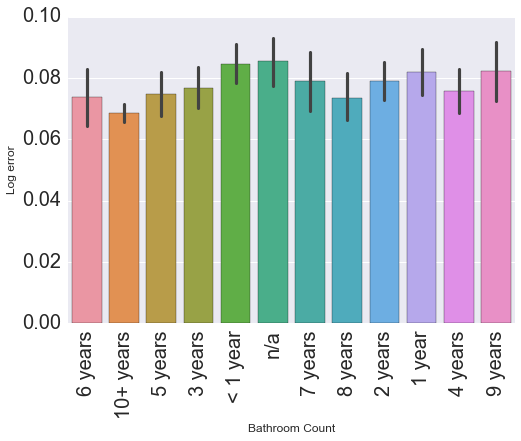

In [36]:
sns.barplot(x="emp_length", y="default", data=data)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')

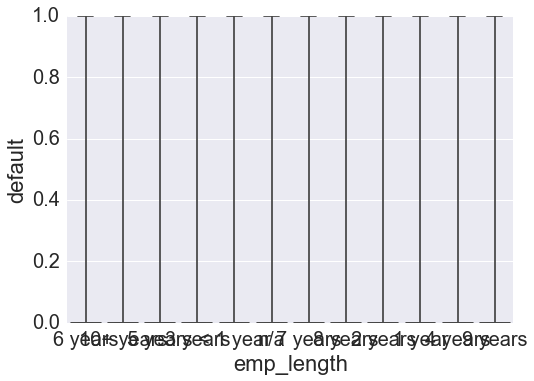

In [32]:
sns.boxplot(data["emp_length"], data["default"])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="num_bedroom", data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=20)
ax.set_xlabel("Number of bedroom", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

plt.show()

In [37]:
# clean emp_length
print "list of the objects in emp_length:"
print list(data["emp_length"].value_counts().index)

list of the objects in emp_length:
['10+ years', '2 years', '3 years', '< 1 year', '1 year', 'n/a', '5 years', '4 years', '8 years', '6 years', '9 years', '7 years']


In [38]:
# built a dictionary 
emp_dict = {'10+ years' : 10, '2 years' : 2, '3 years' : 3, '< 1 year' : 0, '1 year' : 1, 'n/a' : -1, 
            '5 years' : 5, '4 years' : 4, '8 years' : 8, '6 years' : 6, '9 years' : 9, '7 years' : 7}

# I replace missing value with -1
data["emp_length"] = map(lambda x: emp_dict[x], data["emp_length"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

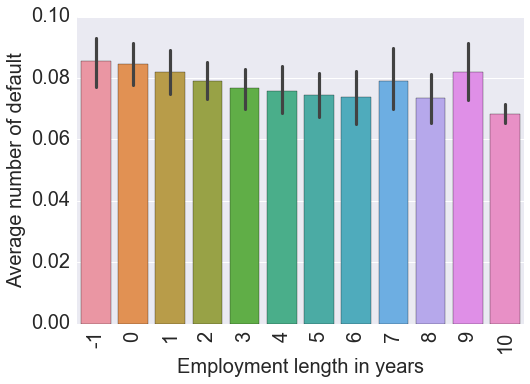

In [41]:
sns.barplot(x="emp_length", y="default", data=data)
plt.ylabel('Average number of default', fontsize=20)
plt.xlabel('Employment length in years', fontsize=20)
plt.xticks(rotation='vertical')

In [53]:
object_type = ['term', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
data_dummies = pd.get_dummies(data[object_type])

In [54]:
data_dummies.shape

(80000, 25)

In [ ]:
# convert object features to int
from sklearn.preprocessing import LabelEncoder
object_type = ['term', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
print("convert object features to int")
for c in object_type:
    data[c] = data[c].fillna(-2)
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

In [55]:
data["loan_status"].value_counts()

Current       62429
Fully Paid    11534
Default        6037
Name: loan_status, dtype: int64

In [28]:
map(lambda x: months[x.split("-")[0]], data["last_credit_pull_d"])

AttributeError: 'float' object has no attribute 'split'

In [31]:
sum(data["issue_d"].isnull())

0

In [ ]:
data.fi